In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [54]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [55]:
def normalize(x):
    x_min = x.min()
    x_max = x.max()
    x_normalized = (x - x_min) / (x_max - x_min)
    return x_normalized

x = normalize(x)

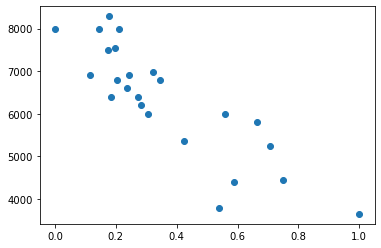

In [56]:
plt.scatter(x, y)

In [57]:
y = y.reshape(y.shape[0],1)

In [58]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [59]:
theta = np.array([[0], [0]])

In [60]:
def model(X, theta):
    return X.dot(theta)

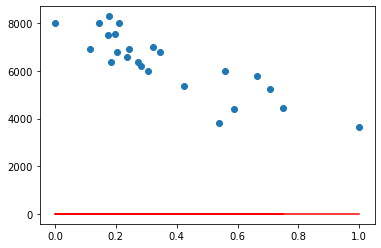

In [61]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [62]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [63]:
cost_function(X, y, theta)

20880519.291666664

In [64]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [65]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [66]:
learning_rate=0.01
n_iterations=28500
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

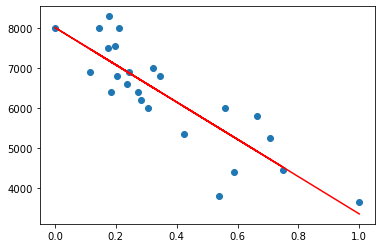

In [67]:
test = np.array([[-4656.59144472], [8008.43983265]])
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

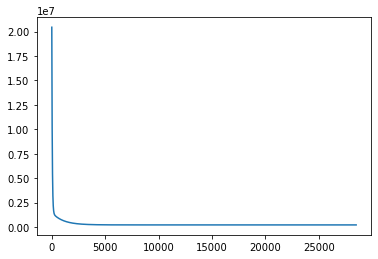

In [68]:
plt.plot(range(n_iterations), cost_history)

In [69]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [70]:
coef_determination(y, predictions)

0.7329747078307112

In [71]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    npoints = len(x)
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    return a, b

In [72]:
a, b = MoindreCarre(x, y)

In [73]:
print("Valeur de theta[0] avec la methode des moindres carre: ", a)
print("Valeur de theta[1] avec la methode des moindres carre: ", b)

Valeur de theta[0] avec la methode des moindres carre:  [-4656.59144472]
Valeur de theta[1] avec la methode des moindres carre:  [8008.43983265]


In [74]:
theta_final

array([[-4656.58663947],
       [ 8008.43801214]])

In [75]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [76]:
save_theta(theta_final[0], theta_final[1])